In [39]:
import numpy as np
import statistics as stats
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define params and helpers

In [24]:
data_dir = 'data'
raw_data_path = 'raw_data.csv'

In [25]:
# Load data

In [26]:
df = pd.read_csv(os.path.join(data_dir, raw_data_path))
df = df.drop(columns=['HN', 'Name'])
print('Number of data: ', len(df))

Number of data:  187


In [27]:
df[:10]

,OperationDate,Implant size,PreOp-SNR,PreOp-SNL,PreOp-CNR,PreOp-CNL,PreOp-BWR,PreOp-BWL,PreOp-BHR,PreOp-BHL,...,PostOp-BWL,PostOp-BHR,PostOp-BHL,PostOp-IMFR,PostOp-IMFL,PostOp-AreRW,PostOp-AreRH,PostOp-AreLW,PostOp-AreLH,PostOp-ID
0,25-Nov-16,275,15.0,15.0,13.5,13.5,12.4,12.4,9.0,9.0,...,11.9,12.7,12.7,8.0,8.0,2.8,2.8,2.8,2.8,0.5
1,18-Nov-16,275,18.5,18.5,17.5,17.5,12.6,12.6,9.0,9.0,...,12.5,13.0,13.0,8.0,8.0,3.0,2.5,3.0,2.5,1.5
2,26-Aug-16,275,16.0,16.0,14.0,13.5,12.0,12.0,10.2,9.8,...,11.8,12.0,12.0,7.5,9.0,3.0,2.5,3.0,2.5,1.5
3,24-Sep-16,275,16.0,16.0,15.0,14.5,13.0,13.0,9.0,9.0,...,13.1,13.5,13.5,6.5,6.5,3.5,3.5,3.5,2.5,1.0
4,28-Oct-16,300,17.5,17.5,16.5,16.5,12.0,12.0,9.8,9.8,...,12.7,13.3,13.3,7.5,8.5,3.0,3.0,3.0,3.0,0.5
5,24-Sep-16,300,17.0,17.0,16.0,16.0,13.0,13.0,11.6,11.6,...,13.3,14.2,14.2,9.0,10.0,4.0,4.0,4.0,4.0,0.1
6,22-Dec-16,300,15.5,15.5,14.0,14.0,12.4,12.4,10.0,10.0,...,12.7,13.0,13.0,8.5,9.0,3.5,3.5,3.5,3.5,0.5
7,28-Dec-15,300,17.5,17.0,15.5,14.5,12.5,12.8,12.4,12.4,...,12.8,14.0,14.0,8.0,9.0,3.8,3.5,3.5,3.5,0.5
8,18-Jul-16,300,18.0,17.0,16.0,15.0,13.0,13.0,11.2,10.0,...,12.3,12.7,12.7,8.0,8.5,3.2,3.0,3.5,3.0,1.0
9,19-Aug-16,325,16.5,16.5,15.5,15.5,12.8,12.8,10.7,10.3,...,13.0,13.7,13.7,8.0,8.0,3.0,3.0,3.0,3.0,0.1


In [28]:
# Show Implant Size
im_sizes = list(set([size for size in df['Implant size'].values]))
print(im_sizes)

['350R 325L', '425R 350L', '295', 'CPG322-255', '275', '325', '300R 325L', 'CPG323', '400', '450', '300R 275L', '325R 300', '250', 'CPG322-330', '250R 275L', 'CPG323-345', '500', '300R 250L', '300', '345', '225', '200R 275L', '250R 300L', 'CPG332-305', 'CPG-322', '350', '375', 'CPG322-295', '322R 330L', '400R 375L']


In [29]:
# Count 
cp_count = 0
hp_same_size_count = 0
hp_count = 0
        
for size in df['Implant size'].values:
    if 'CPG' in size:
        cp_count += 1
    elif 'L' in size or 'R' in size:
        hp_count += 1
    else:
        hp_same_size_count += 1

([<matplotlib.axis.XTick at 0x1e9e8be19b0>,
 <a list of 3 Text xticklabel objects>)

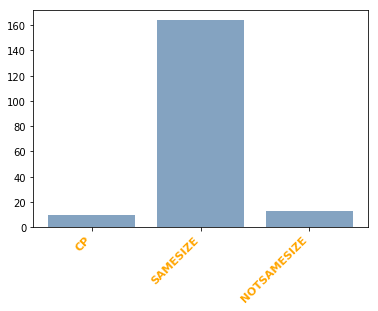

In [30]:
bars = ('CP', 'SAMESIZE', 'NOTSAMESIZE')
height = [cp_count, hp_same_size_count, hp_count]
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.6))
# use the plt.xticks function to custom labels
plt.xticks(y_pos, bars, color='orange', rotation=45, fontweight='bold', fontsize='11', horizontalalignment='right')

In [31]:
# Count unique HP profiles
im_sizes_hp = list(set([size for size in df['Implant size'].values if 'CP' not in size]))
im_sizes_hp.sort()
print(im_sizes_hp)

['200R 275L', '225', '250', '250R 275L', '250R 300L', '275', '295', '300', '300R 250L', '300R 275L', '300R 325L', '322R 330L', '325', '325R 300', '345', '350', '350R 325L', '375', '400', '400R 375L', '425R 350L', '450', '500']


In [32]:
count_dict = {}
for size in im_sizes_hp:
    count = 0
    for val in df['Implant size'].values:
        if val == size:
            count += 1
    count_dict[size] = count


In [33]:
height = []
bars = list(count_dict.keys())
for key in count_dict:
    height.append(count_dict[key])
    
print('Number of data when delete  CP profile: ', sum(height))

Number of data when delete  CP profile:  177


([<matplotlib.axis.XTick at 0x1e9e81a8dd8>,
 <a list of 23 Text xticklabel objects>)

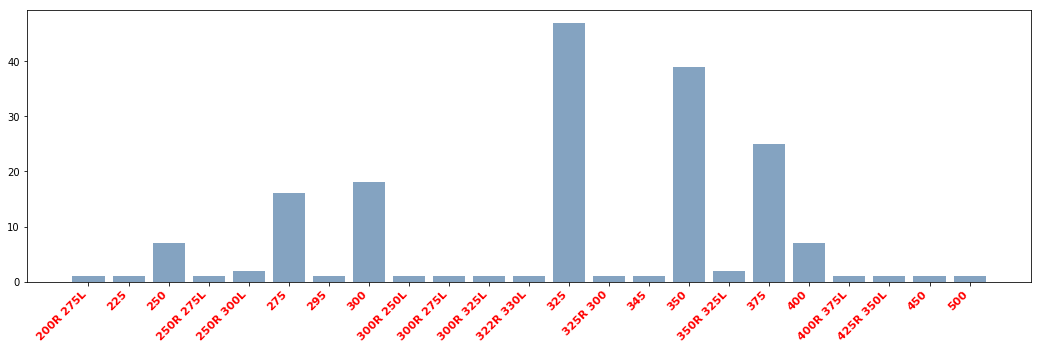

In [34]:
y_pos = np.arange(len(bars))

f, ax = plt.subplots(figsize=(18,5))
plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.6), )
# use the plt.xticks function to custom labels
plt.xticks(y_pos, bars, color='red', rotation=45, fontweight='bold', fontsize='11', horizontalalignment='right')

In [35]:
# Drop CP from dataframe
c_implant = list(set(im_sizes).difference(set(im_sizes_hp)))
c_implant

['CPG332-305',
 'CPG-322',
 'CPG322-330',
 'CPG323-345',
 'CPG322-295',
 'CPG323',
 'CPG322-255']

In [43]:
hp_df = df[~df['Implant size'].isin(c_implant)]
hp_df[:5]

,OperationDate,Implant size,PreOp-SNR,PreOp-SNL,PreOp-CNR,PreOp-CNL,PreOp-BWR,PreOp-BWL,PreOp-BHR,PreOp-BHL,...,PostOp-BWL,PostOp-BHR,PostOp-BHL,PostOp-IMFR,PostOp-IMFL,PostOp-AreRW,PostOp-AreRH,PostOp-AreLW,PostOp-AreLH,PostOp-ID
0,25-Nov-16,275,15.0,15.0,13.5,13.5,12.4,12.4,9.0,9.0,...,11.9,12.7,12.7,8.0,8.0,2.8,2.8,2.8,2.8,0.5
1,18-Nov-16,275,18.5,18.5,17.5,17.5,12.6,12.6,9.0,9.0,...,12.5,13.0,13.0,8.0,8.0,3.0,2.5,3.0,2.5,1.5
2,26-Aug-16,275,16.0,16.0,14.0,13.5,12.0,12.0,10.2,9.8,...,11.8,12.0,12.0,7.5,9.0,3.0,2.5,3.0,2.5,1.5
3,24-Sep-16,275,16.0,16.0,15.0,14.5,13.0,13.0,9.0,9.0,...,13.1,13.5,13.5,6.5,6.5,3.5,3.5,3.5,2.5,1.0
4,28-Oct-16,300,17.5,17.5,16.5,16.5,12.0,12.0,9.8,9.8,...,12.7,13.3,13.3,7.5,8.5,3.0,3.0,3.0,3.0,0.5


In [42]:
stats.median(hp_df['PostopDuration'])

6.0

In [44]:
hp_df['PostopDuration']

0       4.0
1       4.0
2       6.0
3       4.0
4       5.0
5       3.0
6       2.0
7      13.0
8       5.0
9       4.0
10      4.0
11      5.0
12      4.0
13      3.0
14      4.0
15      8.0
16      2.0
17      4.0
18      3.0
19      7.0
20      4.0
21      3.0
22      3.0
23      5.0
24     13.0
25      6.0
26     11.0
27      4.0
28      6.0
29      4.0
       ... 
156     9.0
157     6.0
158     9.0
159     4.5
161     4.5
162     6.0
163     9.0
164     6.0
165     6.0
166     9.0
167    11.0
168     6.0
169    12.0
170     3.0
171     6.0
172    13.0
173    11.0
174     4.0
175    10.0
176     6.0
177    11.0
178    12.0
179     4.0
180     6.5
181     4.0
182     7.0
183    11.0
184     7.0
185     8.0
186     4.0
Name: PostopDuration, Length: 177, dtype: float64